In [216]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://s3-ap-southeast-2.amazonaws.com/www.cryptoknowmics.com/crypto/wp-content/uploads/2019/11/jobss.jpg", width=1024, height=478)

## Description

<ul>
<li>The job market is hard enough to navigate without having to worry about some posting turning out to be a scam—or even just a dead end.</li>
<li>The project focuses on predicting which job descriptions are fraudulent or real using text data and meta data features.</li>
<li>Focuses on identifying key traits/features of job descriptions which are fraudulent in nature.</li>
<li>The main audience of this project will be the students and job- seekers looking for any job opportunities such as: internships, part- time, full-time jobs.</li>
<li>The project has a data of 18K job descriptions out of which about 800 are fake.</li>
</ul>

### Team Members:
<ul>
    <li>Uma Sai Madhuri Jetty</li>
    <li>Sahithi Priya Gutta</li>
    <li>Ankita Kumari</li>
    <li>Ashesh Shahi</li>
</ul>

### Importing all the required libraries

In [217]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from pandas.plotting import scatter_matrix

In [218]:
# Loading the Fake Job Postings Data
data = pd.read_csv("fake_job_postings.csv")

### Preparing and visiualizing the Data

In [219]:
data.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [220]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
job_id                 17880 non-null int64
title                  17880 non-null object
location               17534 non-null object
department             6333 non-null object
salary_range           2868 non-null object
company_profile        14572 non-null object
description            17879 non-null object
requirements           15185 non-null object
benefits               10670 non-null object
telecommuting          17880 non-null int64
has_company_logo       17880 non-null int64
has_questions          17880 non-null int64
employment_type        14409 non-null object
required_experience    10830 non-null object
required_education     9775 non-null object
industry               12977 non-null object
function               11425 non-null object
fraudulent             17880 non-null int64
dtypes: int64(5), object(13)
memory usage: 2.5+ MB


In [221]:
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


#### Lets find the missing values in the data 

In [222]:
data.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

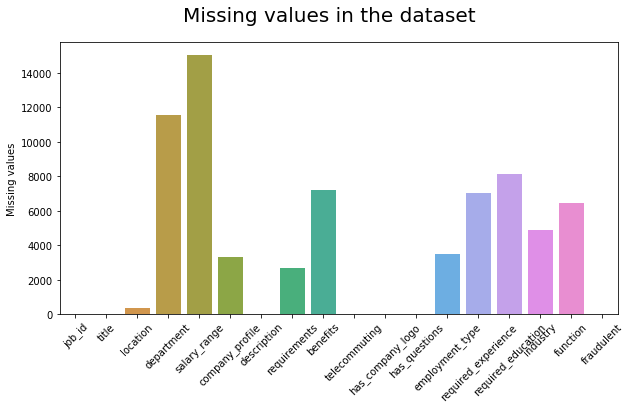

In [223]:
nullvalues = data.isnull().sum()
plt.figure(figsize = (10,5))
sns.barplot(nullvalues.index, nullvalues)
plt.suptitle('Missing values in the dataset', size = 20)
plt.ylabel('Missing values')
plt.xticks(rotation = '45')
plt.show()

As we can see that there are missing values/null values in the dataset which needs to be fixed. Before fixing lets findout the number of categorical and number of numerical variables in the dataset.

In [224]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
job_id                 17880 non-null int64
title                  17880 non-null object
location               17534 non-null object
department             6333 non-null object
salary_range           2868 non-null object
company_profile        14572 non-null object
description            17879 non-null object
requirements           15185 non-null object
benefits               10670 non-null object
telecommuting          17880 non-null int64
has_company_logo       17880 non-null int64
has_questions          17880 non-null int64
employment_type        14409 non-null object
required_experience    10830 non-null object
required_education     9775 non-null object
industry               12977 non-null object
function               11425 non-null object
fraudulent             17880 non-null int64
dtypes: int64(5), object(13)
memory usage: 2.5+ MB


We see that there are 5 numerical and 13 categorical variables. 

#### Fixing the missing values in the dataset

In [225]:
# Filling the missing values in the data set with suitable values according to the domain research done.
data['location'] = data['location'].fillna('Remote')
data['employment_type'] = data['employment_type'].fillna('Unavailable')
data['required_experience'] = data['required_experience'].fillna('Unavailable')
data['required_education'] = data['required_education'].fillna('Unavailable')
data['description'] = data['description'].fillna('Unavailable')
data['requirements'] = data['requirements'].fillna('Unavailable')

In [226]:
# Dropping the column as more than 3/4th values are missing
data = data.drop('salary_range',axis=1)

In [227]:
# Replacing the missing values in department with other as department is needed and can't be removed
data['department'] = data['department'].fillna(value='other')

After going through the dataset and researching the domain we realised that there are some columns which are not useful and doen't have any effect on target variable. Hence decided to drop the columns, as replacing or imputing those doesn't have any useful impact on predictions.

In [228]:
data = data.drop(['company_profile','benefits'], axis=1).sort_index()

In [229]:
# Replacing the missing values in the below columns using the mode
for column in ['industry', 'function']:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [230]:
data.isnull().sum()

job_id                 0
title                  0
location               0
department             0
description            0
requirements           0
telecommuting          0
has_company_logo       0
has_questions          0
employment_type        0
required_experience    0
required_education     0
industry               0
function               0
fraudulent             0
dtype: int64

#### Final data set after cleaning all the missing values

In [231]:
data.head()

,job_id,title,location,department,description,requirements,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,"Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,0,1,0,Other,Internship,Unavailable,Information Technology and Services,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,0,1,0,Full-time,Not Applicable,Unavailable,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",other,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,0,1,0,Unavailable,Unavailable,Unavailable,Information Technology and Services,Information Technology,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",other,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


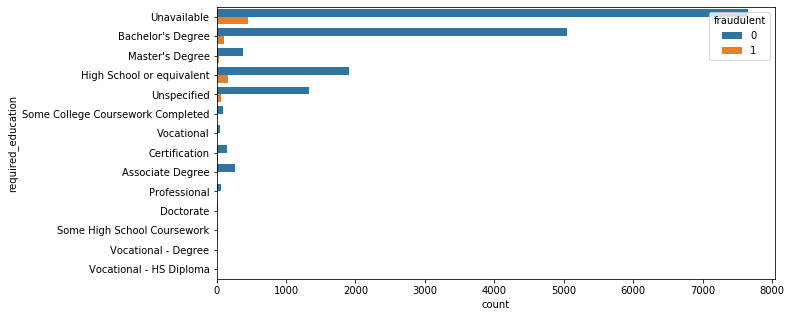

In [232]:
plt.figure(figsize=(10,5))
sns.countplot(hue='fraudulent',y='required_education',data=data)
plt.show()

#### Visulaizing Distribution of Employment type w.r.t Fraudulent cases

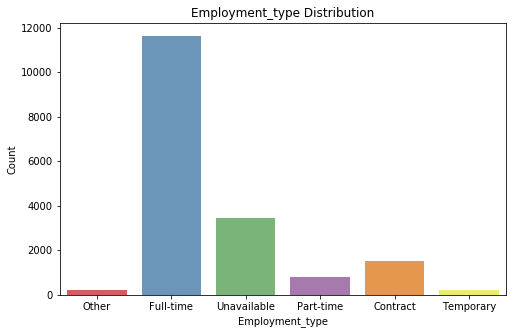

In [233]:
plt.rcParams['figure.figsize'] = (8, 5)
sns.countplot(data = data, x ='employment_type', palette = 'Set1', alpha = 0.8)
plt.title("Employment_type Distribution")
plt.xlabel("Employment_type")
plt.ylabel("Count")
plt.show()

#### Visulaizing Distribution of Required Experience in Job Postings

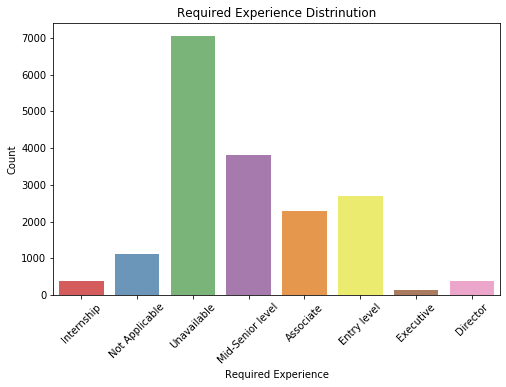

In [234]:
plt.rcParams['figure.figsize'] = (8, 5)
sns.countplot(data = data, x ='required_experience', palette = 'Set1', alpha = 0.8)
plt.title("Required Experience Distrinution")
plt.xlabel("Required Experience")
plt.ylabel("Count")
plt.xticks(rotation = '45')
plt.show()

#### Visulaizing Target Distribution (Fraudulent Job Postings vs Real Job Postings )

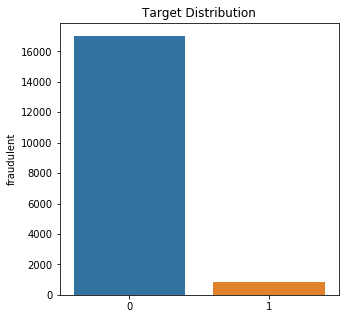

In [235]:
figure = plt.figure(figsize = (5,5))
target_distribution = data['fraudulent'].value_counts()
sns.barplot(target_distribution.index, target_dist)
plt.title('Target Distribution')
plt.show()

#### Visulaizing Relationship between all the variables in data set with fraudulent variable

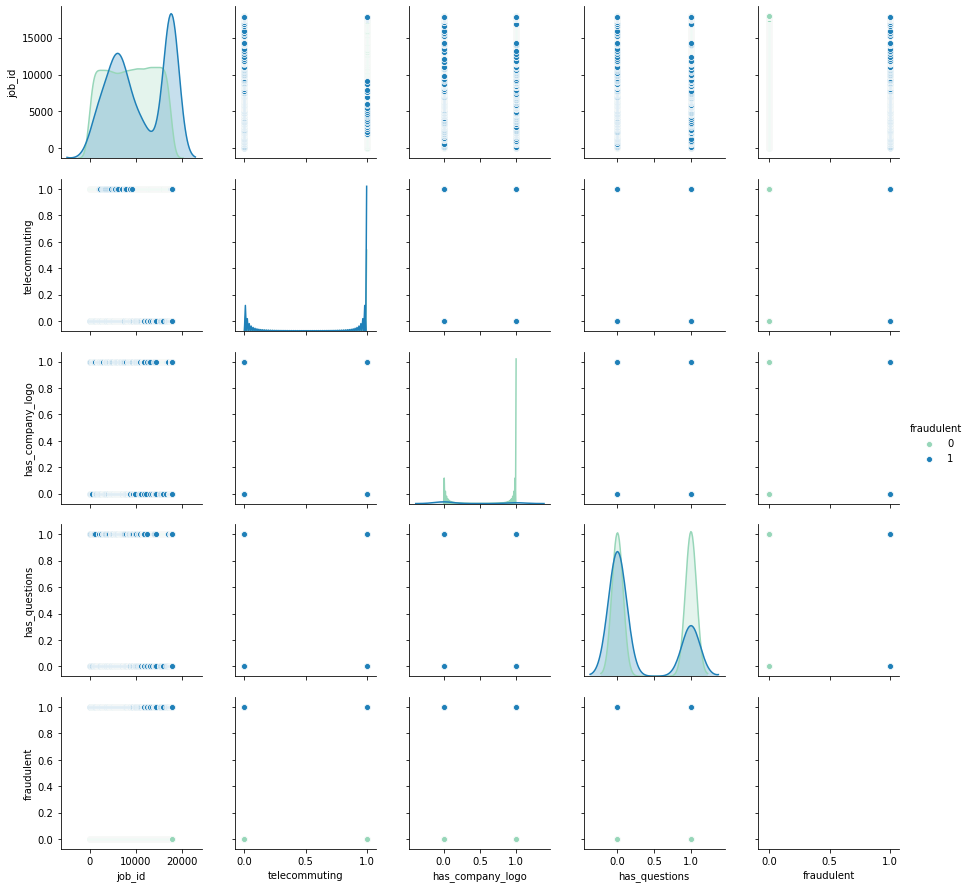

In [236]:
sns.pairplot(data,hue="fraudulent",palette="YlGnBu")

#### Visulaizing Distribution of has_questions variable w.r.t Fraudulent cases

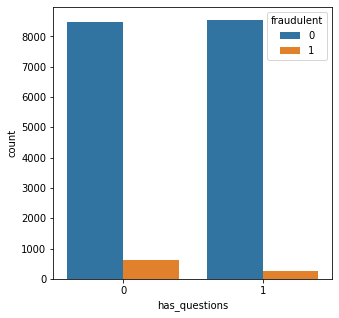

In [237]:
plt.figure(figsize=(5,5))
sns.countplot(hue='fraudulent',x='has_questions',data=data)
plt.show()

#### Visulaizing Distribution of has_company_logo variable w.r.t Fraudulent cases

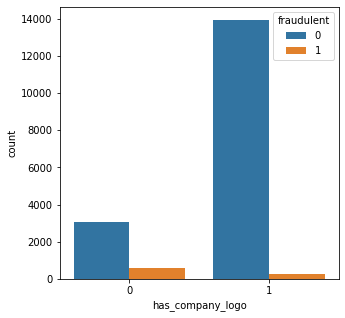

In [238]:
plt.figure(figsize=(5,5))
sns.countplot(hue='fraudulent',x='has_company_logo',data=data)
plt.show()

#### Target Distribution using Pie plot to show the percentage of fraudulent cases in the dataset

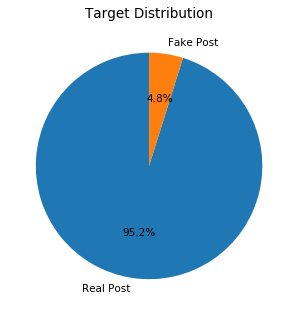

In [239]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5), dpi = 75)
plt.tight_layout()
labels='Real Post', 'Fake Post'
temp = data["fraudulent"].value_counts()
plt.pie(temp,labels=labels,startangle=90, autopct='%.1f%%')
plt.title('Target Distribution', fontsize = 13)
plt.show()